# Task1

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold

### 1.1

In [3]:
credit = fetch_openml('credit-g', as_frame = True)
df=credit.data
df['class'] = credit.target
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
checking_status           1000 non-null category
duration                  1000 non-null float64
credit_history            1000 non-null category
purpose                   1000 non-null category
credit_amount             1000 non-null float64
savings_status            1000 non-null category
employment                1000 non-null category
installment_commitment    1000 non-null float64
personal_status           1000 non-null category
other_parties             1000 non-null category
residence_since           1000 non-null float64
property_magnitude        1000 non-null category
age                       1000 non-null float64
other_payment_plans       1000 non-null category
housing                   1000 non-null category
existing_credits          1000 non-null float64
job                       1000 non-null category
num_dependents            1000 non-null float64
own_telephone      

Continuous data:\
duration, credit_amount, installment_commitment, residence_since, age, existing_credits, num_dependents

Categorical data:\
checking_status, credit_history, purpose, savings_status, employment, personal_status, other_parties, property_magnitude, other_payment_plans, housing, job, own_telephone, foreign_worker, 

### 1.2

Text(0, 0.5, 'Frequency')

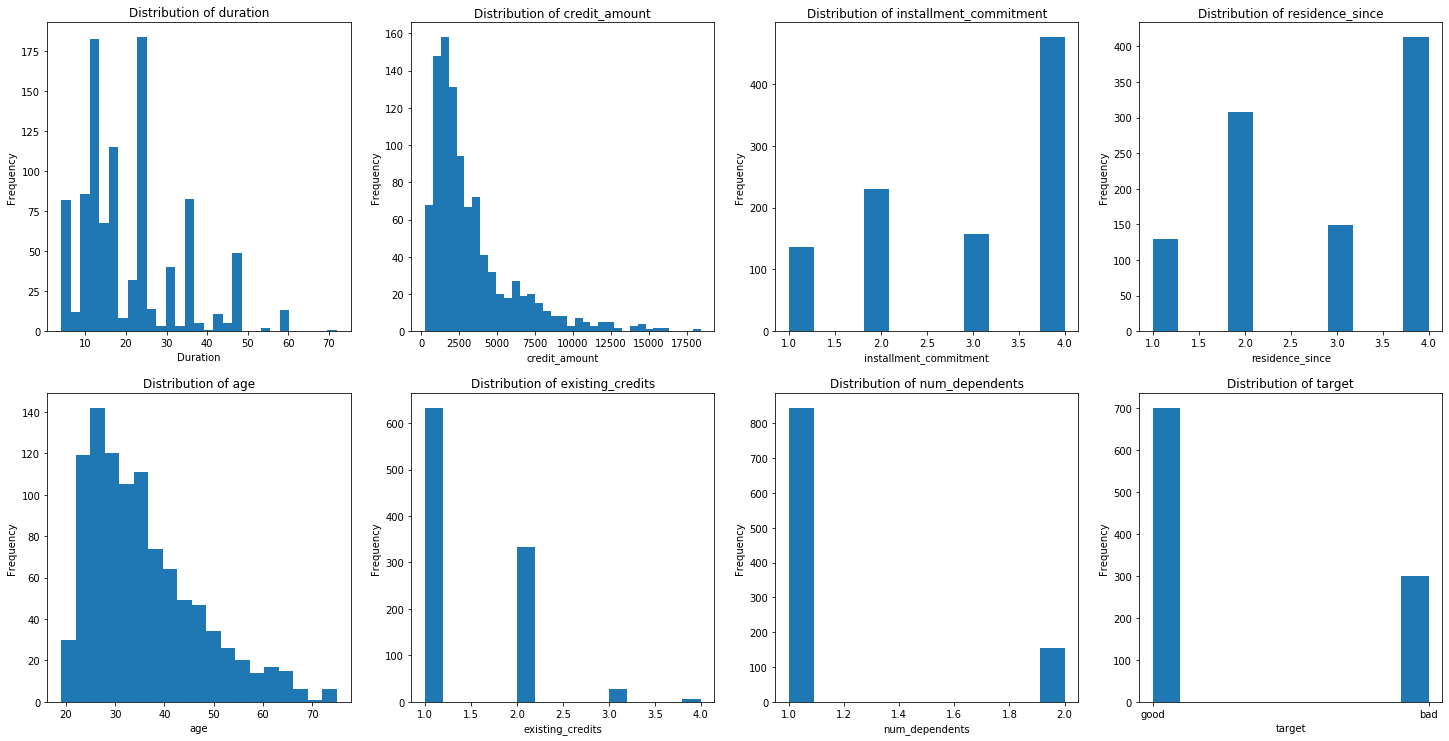

In [4]:
fig, ax = plt.subplots(2,4, figsize=(25,12.5));
ax[0,0].hist(df['duration'], bins='auto');
ax[0,0].set_title('Distribution of duration')
ax[0,0].set_xlabel('Duration')
ax[0,0].set_ylabel('Frequency')

ax[0,1].hist(df['credit_amount'], bins='auto');
ax[0,1].set_title('Distribution of credit_amount')
ax[0,1].set_xlabel('credit_amount')
ax[0,1].set_ylabel('Frequency')

ax[0,2].hist(df['installment_commitment'], bins='auto');
ax[0,2].set_title('Distribution of installment_commitment')
ax[0,2].set_xlabel('installment_commitment')
ax[0,2].set_ylabel('Frequency')

ax[0,3].hist(df['residence_since'], bins='auto');
ax[0,3].set_title('Distribution of residence_since')
ax[0,3].set_xlabel('residence_since')
ax[0,3].set_ylabel('Frequency')

ax[1,0].hist(df['age'], bins='auto');
ax[1,0].set_title('Distribution of age')
ax[1,0].set_xlabel('age')
ax[1,0].set_ylabel('Frequency')

ax[1,1].hist(df['existing_credits'], bins='auto');
ax[1,1].set_title('Distribution of existing_credits')
ax[1,1].set_xlabel('existing_credits')
ax[1,1].set_ylabel('Frequency')

ax[1,2].hist(df['num_dependents'], bins='auto');
ax[1,2].set_title('Distribution of num_dependents')
ax[1,2].set_xlabel('num_dependents')
ax[1,2].set_ylabel('Frequency')

ax[1,3].hist(df['class']);
ax[1,3].set_title('Distribution of target')
ax[1,3].set_xlabel('target')
ax[1,3].set_ylabel('Frequency')

### 1.3

In [5]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X_trainval, X_test, y_trainval, y_test = train_test_split(X,y, random_state = 123)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, random_state = 123)

X_train_cont = X_train.loc[:,X.columns[X.dtypes != 'category']]
X_val_cont = X_val.loc[:,X.columns[X.dtypes != 'category']]
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_cont)
X_val_scaled = scaler.transform(X_val_cont)

X_train.loc[:,X.columns[X.dtypes != 'category']] = X_train_scaled
X_val.loc[:,X.columns[X.dtypes != 'category']] = X_val_scaled

X_train = pd.get_dummies(X_train)
X_val = pd.get_dummies(X_val)

lr = LogisticRegression().fit(X_train, y_train)
lr.score(X_val, y_val) #evaluate an initial Logistic Regression model w/an traning/validation split

0.7446808510638298

### 1.4

In [6]:
categorical = df.iloc[:,:-1].dtypes != float
preprocess_scaled = make_column_transformer(
    (StandardScaler(), ~categorical),
    (OneHotEncoder(),categorical))
preprocess_notscaled = make_column_transformer(
    (OneHotEncoder(),categorical))

In [7]:
#pipe = make_pipeline(StandardScaler(),LogisticRegression())
#pipe_fit(X_train, y_train)
#pipe_score(X_test,y_tesgt)

In [8]:
#CVscore=[]
#Logistic Regression 
#Non Scaled
lr_p_n = make_pipeline(preprocess_notscaled, LogisticRegression())
lr_n_scores = np.mean(cross_val_score(lr_p_n,df.iloc[:,:-1],df.iloc[:,-1], cv=10))

#Scaled
lr_p_y = make_pipeline(preprocess_scaled, LogisticRegression())
lr_y_scores = np.mean(cross_val_score(lr_p_y,df.iloc[:,:-1],df.iloc[:,-1], cv=10))

#Linear Support Vector Machine
#Non Scaled
svc_p_n = make_pipeline(preprocess_notscaled, LinearSVC(max_iter=5000))
svc_n_scores = np.mean(cross_val_score(svc_p_n,df.iloc[:,:-1],df.iloc[:,-1], cv=10))
#Scaled
svc_p_y = make_pipeline(preprocess_scaled, LinearSVC(max_iter=5000))
svc_y_scores = np.mean(cross_val_score(svc_p_y,df.iloc[:,:-1],df.iloc[:,-1], cv=10))

#KNN
#Non Scaled
knn_p_n = make_pipeline(preprocess_notscaled, KNeighborsClassifier())
knn_n_scores = np.mean(cross_val_score(knn_p_n,df.iloc[:,:-1],df.iloc[:,-1], cv=10))

#Scaled
knn_p_y = make_pipeline(preprocess_scaled, KNeighborsClassifier())
knn_y_scores = np.mean(cross_val_score(knn_p_y,df.iloc[:,:-1],df.iloc[:,-1], cv=10))

print('Cross Validation score for Logistic Regression: without scaling is {s1:.3f}, the score with scaling is {s2:.3f}.'
      .format(s1=lr_n_scores, s2=lr_y_scores)) 
print('Cross Validation score for Linear Support Vector Machine: without scaling is {s1:.3f}, the score with scaling is {s2:.3f}.'
      .format(s1=svc_n_scores, s2=svc_y_scores)) 
print('Cross Validation score for K Nearest Neighbors: without scaling is {s1:.3f}, the score with scaling is {s2:.3f}.'
      .format(s1=knn_n_scores, s2=knn_y_scores)) 

Cross Validation score for Logistic Regression: without scaling is 0.741, the score with scaling is 0.750.
Cross Validation score for Linear Support Vector Machine: without scaling is 0.739, the score with scaling is 0.752.
Cross Validation score for K Nearest Neighbors: without scaling is 0.714, the score with scaling is 0.722.


Overall, the scaled data provides higher cross validation score.
Logistic Regression and Linear Support Vectore Machine performs well for both scaled and unscaled data. KNN is a bit worse. However, KNN also increases in its CV score.
The modification changes the result because after scaling, the classification process will be less affected by scales. Therefore, scaling features with StandardScaler can increase accuracies.

### 1.5

In [9]:
#Logistic Regression
lr_pipe = make_pipeline(preprocess_scaled, LogisticRegression())
param = np.logspace(-4,4,9)
lr_param = {'logisticregression__C': param}
gridlr = GridSearchCV(lr_pipe, lr_param, cv=10, return_train_score=True)
gridlr.fit(X_trainval, y_trainval)
print("best parameters: ", gridlr.best_params_)
print("best_mean cv score: ", gridlr.best_score_)

#Linear Support Vector Machine
svm_pipe = make_pipeline(preprocess_scaled, LinearSVC())
svm_param = {'linearsvc__C': np.logspace(-4,4,9)}
gridsvm = GridSearchCV(svm_pipe, svm_param, cv=10, return_train_score=True)
gridsvm.fit(X_trainval, y_trainval)
print("best parameters: ", gridsvm.best_params_)
print("best_mean cv score: ", gridsvm.best_score_)

##KNN
knn_pipe = make_pipeline(preprocess_scaled, KNeighborsClassifier())
knn_param = {'kneighborsclassifier__n_neighbors': np.arange(1, 15, 2)}
gridknn = GridSearchCV(knn_pipe, knn_param, cv=10, return_train_score=True)
gridknn.fit(X_trainval, y_trainval)
print("best parameters: ", gridknn.best_params_)
print("best_mean cv score: ", gridknn.best_score_)

best parameters:  {'logisticregression__C': 0.1}
best_mean cv score:  0.7533333333333334
best parameters:  {'linearsvc__C': 0.01}
best_mean cv score:  0.752
best parameters:  {'kneighborsclassifier__n_neighbors': 13}
best_mean cv score:  0.7506666666666668


In [10]:
print("LR: test-set score: {:.3f}".format(gridlr.score(X_test, y_test)))
print("SVM: test-set score: {:.3f}".format(gridsvm.score(X_test, y_test)))
print("KNN: test-set score: {:.3f}".format(gridknn.score(X_test, y_test)))

LR: test-set score: 0.732
SVM: test-set score: 0.724
KNN: test-set score: 0.716


The best model is logistic regression model with hyperparameter = 0.1 with best mean cv score 0.753.
The test set score is 0.732

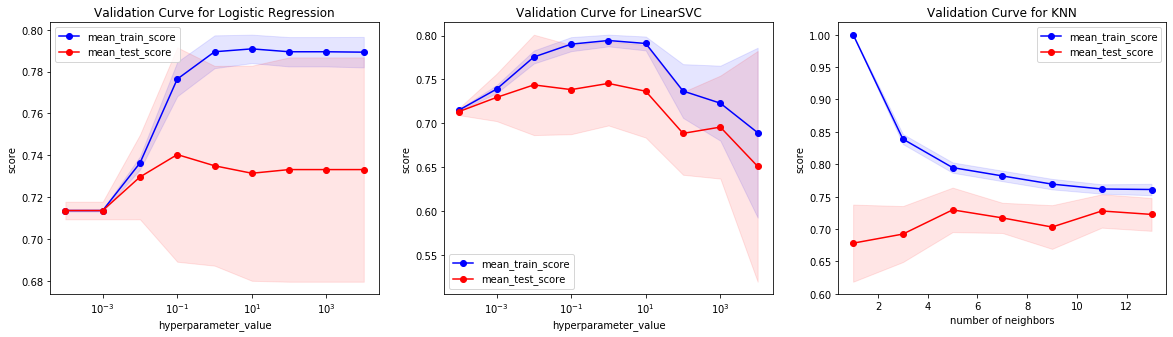

In [11]:
#plot
figg, axx = plt.subplots(1,3, figsize=(20,5))
##Logistic Regression
train_scores_lr,test_scores_lr = validation_curve(LogisticRegression(),X_train, y_train,
                                                  'C',param,cv=10,scoring='accuracy')
mean_train_scores_lr = np.mean(train_scores_lr,1)
std_train_scores_lr = np.std(train_scores_lr,1)
mean_test_scores_lr = np.mean(test_scores_lr,1)
std_test_scores_lr = np.std(test_scores_lr,1)

axx[0].semilogx(param, mean_train_scores_lr,"o-",
                color="b", label="mean_train_score")
axx[0].semilogx(param, mean_test_scores_lr,"o-",
                color="r", label="mean_test_score")
axx[0].fill_between(param,mean_train_scores_lr-std_train_scores_lr,
                 mean_train_scores_lr+std_train_scores_lr,color='b',alpha=0.1)
axx[0].fill_between(param,mean_test_scores_lr-std_test_scores_lr,
                 mean_test_scores_lr+std_test_scores_lr,color='r',alpha=0.1)
axx[0].set_xlabel('hyperparameter_value') ;
axx[0].set_ylabel('score');
axx[0].set_title('Validation Curve for Logistic Regression');
axx[0].legend(loc='best')

##SVC
train_scores_svc,test_scores_svc = validation_curve(LinearSVC(),X_train, y_train,
                                                  'C',param,cv=10,scoring='accuracy')
mean_train_scores_svc = np.mean(train_scores_svc,1)
std_train_scores_svc = np.std(train_scores_svc,1)
mean_test_scores_svc = np.mean(test_scores_svc,1)
std_test_scores_svc = np.std(test_scores_svc,1)

axx[1].semilogx(param, mean_train_scores_svc,"o-",
                color="b", label="mean_train_score")
axx[1].semilogx(param, mean_test_scores_svc,"o-",
                color="r", label="mean_test_score")
axx[1].fill_between(param,mean_train_scores_svc-std_train_scores_svc,
                 mean_train_scores_svc+std_train_scores_svc,color='b',alpha=0.1)
axx[1].fill_between(param,mean_test_scores_svc-std_test_scores_svc,
                 mean_test_scores_svc+std_test_scores_svc,color='r',alpha=0.1)
axx[1].set_xlabel('hyperparameter_value') ;
axx[1].set_ylabel('score');
axx[1].set_title('Validation Curve for LinearSVC');
axx[1].legend(loc='best')

##KNN
train_scores_knn,test_scores_knn = validation_curve(KNeighborsClassifier(),
                                                    X_train, y_train,'n_neighbors',np.arange(1, 15, 2),
                                                    cv=10,scoring='accuracy')
mean_train_scores_knn = np.mean(train_scores_knn,1)
std_train_scores_knn = np.std(train_scores_knn,1)
mean_test_scores_knn = np.mean(test_scores_knn,1)
std_test_scores_knn = np.std(test_scores_knn,1)

axx[2].plot(np.arange(1, 15, 2), mean_train_scores_knn,"o-",
                color="b", label="mean_train_score")
axx[2].plot(np.arange(1, 15, 2), mean_test_scores_knn,"o-",
                color="r", label="mean_test_score")
axx[2].fill_between(np.arange(1, 15, 2),mean_train_scores_knn-std_train_scores_knn,
                 mean_train_scores_knn+std_train_scores_knn,color='b',alpha=0.1)
axx[2].fill_between(np.arange(1, 15, 2),mean_test_scores_knn-std_test_scores_knn,
                 mean_test_scores_knn+std_test_scores_knn,color='r',alpha=0.1)
axx[2].set_xlabel('number of neighbors') ;
axx[2].set_ylabel('score');
axx[2].set_title('Validation Curve for KNN');
axx[2].legend(loc='best')


## 1.6

In [12]:
#Change stratified Kfold to Kfold shuffling.
kfold = KFold(n_splits = 10, shuffle = True, random_state=123)

kfold_cv_lr = GridSearchCV(lr_p_y, param_grid = lr_param, 
                           cv = kfold, return_train_score = True)
kfold_cv_lr.fit(X_trainval, y_trainval)
print("The best parameter for Logistic Regression is: ", kfold_cv_lr.best_params_)
kfold_cv_svc = GridSearchCV(svc_p_y, param_grid = svm_param, 
                           cv = kfold, return_train_score = True)
kfold_cv_svc.fit(X_trainval, y_trainval)
print("The best parameter for Linear SVC is: ", kfold_cv_svc.best_params_)


kfold_cv_knn = GridSearchCV(knn_p_y, param_grid = knn_param,
                           cv = kfold, return_train_score = True)
kfold_cv_knn.fit(X_trainval, y_trainval)
print("The best parameter for KNN is: ", kfold_cv_knn.best_params_)


The best parameter for Logistic Regression is:  {'logisticregression__C': 0.1}
The best parameter for Linear SVC is:  {'linearsvc__C': 0.01}
The best parameter for KNN is:  {'kneighborsclassifier__n_neighbors': 13}


After changing cross validation strategy from 'stratified k-fold' to 'kfold' with shuffling, all parameters stays same.

In [13]:
#Change Random States
randstate = np.arange(0,100,23)
##LR
for i in range(len(randstate)):
    kfold_cv1 = GridSearchCV(lr_p_y, param_grid = lr_param, 
                           cv = KFold(n_splits = 10, shuffle = True, random_state=randstate[i]),
                            return_train_score = True)
    kfold_cv1.fit(X_trainval, y_trainval)
    print('The best parameter for logistic regression is:', kfold_cv1.best_params_,
         'when random state =', randstate[i])

#SVC
for i in range(len(randstate)):
    kfold_cv1 = GridSearchCV(svc_p_y, param_grid = svm_param, 
                           cv = KFold(n_splits = 10, shuffle = True, random_state=randstate[i]),
                            return_train_score = True)
    kfold_cv1.fit(X_trainval, y_trainval)
    print('The best parameter for Linear SVC is:', kfold_cv1.best_params_,
         'when random state =', randstate[i])
    
#KNN
for i in range(len(randstate)):
    kfold_cv1 = GridSearchCV(knn_p_y, param_grid = knn_param, 
                           cv = KFold(n_splits = 10, shuffle = True, random_state=randstate[i]),
                            return_train_score = True)
    kfold_cv1.fit(X_trainval, y_trainval)
    print('The best parameter for KNN is:', kfold_cv1.best_params_,
         'when random state =', randstate[i])

The best parameter for logistic regression is: {'logisticregression__C': 0.1} when random state = 0
The best parameter for logistic regression is: {'logisticregression__C': 1.0} when random state = 23
The best parameter for logistic regression is: {'logisticregression__C': 0.1} when random state = 46
The best parameter for logistic regression is: {'logisticregression__C': 0.1} when random state = 69
The best parameter for logistic regression is: {'logisticregression__C': 0.1} when random state = 92
The best parameter for Linear SVC is: {'linearsvc__C': 0.1} when random state = 0
The best parameter for Linear SVC is: {'linearsvc__C': 0.1} when random state = 23
The best parameter for Linear SVC is: {'linearsvc__C': 0.01} when random state = 46
The best parameter for Linear SVC is: {'linearsvc__C': 1.0} when random state = 69
The best parameter for Linear SVC is: {'linearsvc__C': 0.01} when random state = 92
The best parameter for KNN is: {'kneighborsclassifier__n_neighbors': 13} when ra

If we change random seed of the shuffling, best parameters do have difference in different random states for all three models.

In [14]:
#Change random state when spliting data into train and test sets.
#LR
for j in range(len(randstate)):
    X_trainval1, X_test1, y_trainval1, y_test1 = train_test_split(X, y, random_state = randstate[j])
    s_cv = GridSearchCV(lr_p_y, param_grid = lr_param, 
                           cv = KFold(n_splits = 10, shuffle = True, random_state=123),
                        return_train_score = True)
    s_cv.fit(X_trainval1, y_trainval1)
    print('The best parameter for logistic regression is:', s_cv.best_params_,
         'when random state for spliting dataset =', randstate[j])

The best parameter for logistic regression is: {'logisticregression__C': 0.1} when random state for spliting dataset = 0
The best parameter for logistic regression is: {'logisticregression__C': 0.1} when random state for spliting dataset = 23
The best parameter for logistic regression is: {'logisticregression__C': 100.0} when random state for spliting dataset = 46
The best parameter for logistic regression is: {'logisticregression__C': 1.0} when random state for spliting dataset = 69
The best parameter for logistic regression is: {'logisticregression__C': 1.0} when random state for spliting dataset = 92


In [15]:
#SVC
for j in range(len(randstate)):
    X_trainval1, X_test1, y_trainval1, y_test1 = train_test_split(X, y, random_state = randstate[j])
    s_cv = GridSearchCV(svc_p_y, param_grid = svm_param, 
                           cv = KFold(n_splits = 10, shuffle = True, random_state=123),
                            return_train_score = True)
    s_cv.fit(X_trainval1, y_trainval1)
    print('The best parameter for LinearSVC is:', s_cv.best_params_,
         'when random state for spliting dataset =', randstate[j])

The best parameter for LinearSVC is: {'linearsvc__C': 0.1} when random state for spliting dataset = 0
The best parameter for LinearSVC is: {'linearsvc__C': 0.01} when random state for spliting dataset = 23
The best parameter for LinearSVC is: {'linearsvc__C': 0.1} when random state for spliting dataset = 46
The best parameter for LinearSVC is: {'linearsvc__C': 100.0} when random state for spliting dataset = 69
The best parameter for LinearSVC is: {'linearsvc__C': 0.1} when random state for spliting dataset = 92


In [16]:
#KNN
for j in range(len(randstate)):
    X_trainval1, X_test1, y_trainval1, y_test1 = train_test_split(X, y, random_state = randstate[j])
    s_cv = GridSearchCV(knn_p_y, param_grid = knn_param, 
                           cv = KFold(n_splits = 10, shuffle = True, random_state=123),
                            return_train_score = True)
    s_cv.fit(X_trainval1, y_trainval1)
    print('The best parameter for KNN is:', s_cv.best_params_,
         'when random state for spliting dataset =', randstate[j])

The best parameter for KNN is: {'kneighborsclassifier__n_neighbors': 5} when random state for spliting dataset = 0
The best parameter for KNN is: {'kneighborsclassifier__n_neighbors': 3} when random state for spliting dataset = 23
The best parameter for KNN is: {'kneighborsclassifier__n_neighbors': 7} when random state for spliting dataset = 46
The best parameter for KNN is: {'kneighborsclassifier__n_neighbors': 13} when random state for spliting dataset = 69
The best parameter for KNN is: {'kneighborsclassifier__n_neighbors': 7} when random state for spliting dataset = 92


If we change the reandom state of the split into training and test data, parameters would have chance to change for all methods.

## 1.7

Text(0, 0.5, 'Coefficient Name')

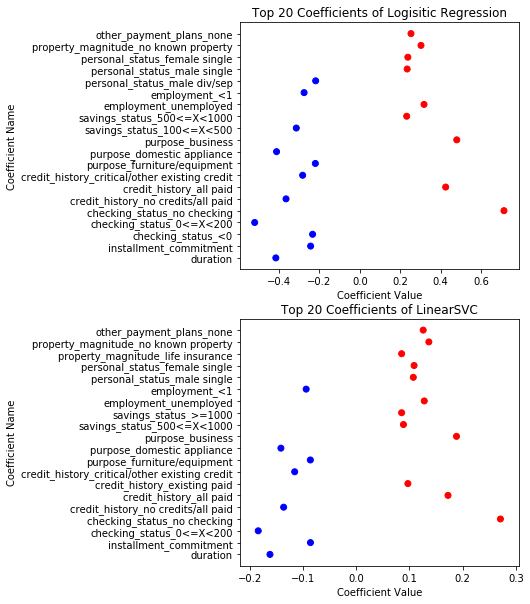

In [17]:
fig, ax = plt.subplots(2, 1, figsize = (5, 10))
columns = pd.get_dummies(X).columns
coef_lr = gridlr.best_estimator_[1].coef_[0]
idx_lr = np.sort(np.abs(coef_lr).argsort()[-20:][::-1])
ax[0].scatter(coef_lr[idx_lr],columns[idx_lr], c = np.sign(coef_lr[idx_lr]), cmap='bwr')
ax[0].set_title('Top 20 Coefficients of Logisitic Regression')
ax[0].set_xlabel('Coefficient Value')
ax[0].set_ylabel('Coefficient Name')

coef_svc = gridsvm.best_estimator_[1].coef_[0]
idx_svc = np.sort(np.abs(coef_svc).argsort()[-20:][::-1])
ax[1].scatter(coef_svc[idx_svc],columns[idx_svc], c = np.sign(coef_svc[idx_svc]), cmap='bwr')
ax[1].set_title('Top 20 Coefficients of LinearSVC')
ax[1].set_xlabel('Coefficient Value')
ax[1].set_ylabel('Coefficient Name')

